In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import time

def load_data(file_path: str):
    df = pd.read_csv(file_path, header=None)
    df.columns = [
        'sepal_length',
        'sepal_width',
        'petal_length',
        'petal_width',
        'class'
    ]
    return df


df = load_data('/content/drive/MyDrive/Colab Notebooks/31_DM/30_homeWork3/iris.data')

x: pd.DataFrame = df.iloc()[:, :-1]
scaler = StandardScaler()
x_nol = scaler.fit_transform(x)
x_nol=pd.DataFrame(x_nol,columns=x.columns)

In [2]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
x_nol

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [5]:
temp=x_nol.round(6)
temp.describe().round(5)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00000,150.00000,150.00000,150.00000
mean,-0.00000,-0.00000,0.00000,0.00000
std,1.00335,1.00335,1.00335,1.00335
min,-1.87002,-2.43899,-1.56874,-1.44445
25%,-0.90068,-0.58776,-1.22754,-1.18150
50%,-0.05251,-0.12496,0.33627,0.13323
75%,0.67450,0.56925,0.76276,0.79059
max,2.49202,3.11468,1.78634,1.71090


In [6]:
temp

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [7]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
neigh.fit(x_nol)

NearestNeighbors()

In [8]:
temp=pd.DataFrame()
for i in range(5,50,5):
  X_dist=neigh.kneighbors(x_nol,i)
  temp[i]=sorted(X_dist[0][:,-1])


Text(0.5, 0, 'points sorted distance of k nearest neighbor')

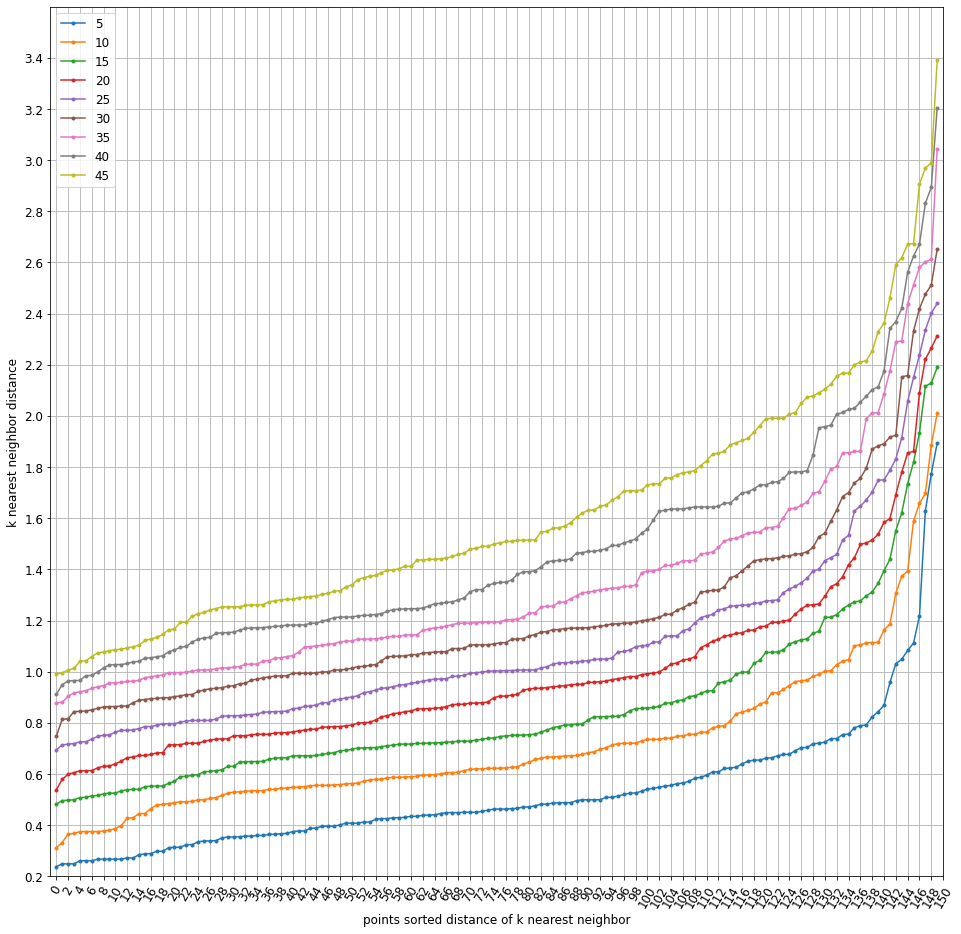

In [42]:
yticks=np.arange(0.2,3.6,0.2)
xticks=np.arange(0,151,2)
temp=temp.round(decimals=6)
temp.plot(figsize=(16,16),yticks=yticks,xticks=xticks,rot=(60),ylim=(0.2,3.6),xlim=(-1,150),
       fontsize=12,grid=True,style ='.-')
plt.legend(prop={"size":12})
plt.ylabel('k nearest neighbor distance',fontsize=12)
plt.xlabel('points sorted distance of k nearest neighbor',fontsize=12)

In [10]:
temp1:pd.DataFrame=temp.diff(1).dropna()/temp.iloc()[1:,:]*100
print(temp1.max(axis=0))
print(temp1.idxmax(axis=0))

5     25.254624
10    12.360871
15     8.563432
20    10.962856
25     6.910854
30    10.578738
35    14.178999
40     9.730442
45    11.886666
dtype: float64
5     147
10    145
15    147
20    146
25    144
30    143
35    149
40    149
45    149
dtype: int64


In [11]:
temp.iloc()[temp1.idxmax(axis=0)-1,]

,5,10,15,20,25,30,35,40,45
146,1.218094,1.657986,1.934945,2.091061,2.237894,2.419431,2.580262,2.671039,2.906459
144,1.083392,1.393605,1.735179,1.854802,2.056591,2.157953,2.438763,2.561445,2.671054
146,1.218094,1.657986,1.934945,2.091061,2.237894,2.419431,2.580262,2.671039,2.906459
145,1.112085,1.590163,1.819622,1.861821,2.150667,2.332363,2.511433,2.625387,2.673631
143,1.048873,1.373442,1.620819,1.780072,1.914463,2.152563,2.292433,2.420173,2.617846
142,1.031365,1.306508,1.551933,1.692082,1.832186,1.924849,2.290229,2.369033,2.591788
148,1.774121,1.886989,2.128451,2.264754,2.401700,2.511631,2.611703,2.893430,2.989014
148,1.774121,1.886989,2.128451,2.264754,2.401700,2.511631,2.611703,2.893430,2.989014
148,1.774121,1.886989,2.128451,2.264754,2.401700,2.511631,2.611703,2.893430,2.989014


# DBSCAN fit


In [12]:
k_stat = time.time()
db_scan = DBSCAN(eps=1.218094, min_samples=5)
db_scan_lable = db_scan.fit_predict(x)
k_end = time.time() - k_stat
print(f'using time is {k_end*1000:.6f} ms ')

using time is 10.387421 ms 


In [13]:
df['db_scan_lable'] = db_scan_lable

df_db_scan = df.pivot_table(index=['db_scan_lable'],
                     columns=['class'],
                     values=['sepal_length'],
                     aggfunc="count")

df_db_scan.columns = df['class'].value_counts().index
df_db_scan = df_db_scan.fillna(value=0)
df_db_scan

,Iris-versicolor,Iris-virginica,Iris-setosa
db_scan_lable,,,
0,50.0,0.0,0.0
1,0.0,50.0,50.0


# purity

In [14]:
def get_purity(df: pd.DataFrame):
    temp = df / df.sum()
    purity = temp.max()
    return purity


df_db_scan['purity'] = df_db_scan.apply(get_purity, axis=1)
df_db_scan['purity_weight'] = (df_db_scan.loc()[0:,'purity'] * (df_db_scan.loc()[0:,'Iris-versicolor':'Iris-setosa'].sum(axis=1) / df_db_scan.loc()[0:,'Iris-versicolor':'Iris-setosa'].sum(axis=1).sum()))
db_scan_total_purity = df_db_scan['purity_weight'].sum()
print(f'total purity for DBSCAN is {db_scan_total_purity:.6f}')
df_db_scan

total purity for DBSCAN is 0.666667


,Iris-versicolor,Iris-virginica,Iris-setosa,purity,purity_weight
db_scan_lable,,,,,
0,50.0,0.0,0.0,1.0,0.333333
1,0.0,50.0,50.0,0.5,0.333333
